In [1]:
Project = '/Users/daehwa/Library/CloudStorage/OneDrive-Personal/Junlab/Projects/Adipocyte'

from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as patches

plt.rcParams.update(plt.rcParamsDefault)

mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"

plt.rcParams['ps.useafm']=True
plt.rcParams['pdf.fonttype']=42

plt.rc('font', size=7)          # controls default text sizes
plt.rc('axes', titlesize=7)     # fontsize of the axes title
plt.rc('axes', labelsize=7)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=6)    # fontsize of the tick labels
plt.rc('ytick', labelsize=6)    # fontsize of the tick labels
plt.rc('legend', fontsize=6)    # legend fontsize
suptitlesize = 7

plt.rc('axes', axisbelow=True) #push axes to back
mpl.rcParams['axes.linewidth'] = 0.5

In [2]:
days = ['D4','D8']
reps = ['a','b','c']

codons = list(set([a+b+c for a in ['U','C','A','G'] for b in ['U','C','A','G'] for c in ['U','C','A','G']]) - {'UAA','UAG','UGA', 'GAA','GAG', 'GCG','CCG','UCG','ACG'}) + ['GCG','CCG','UCG','ACG'] + ['GAG','GAA']
scope = 150
band_len = scope*2+3

In [3]:
raw_data = {}
for codon in codons:
    raw_data[codon] = pd.read_excel(f'{Project}/Results/Tables/Codon_analysis/metagene_around_codon/v20220917/adi_metagene_around_codon.xlsx', sheet_name=codon)

diff_data = {}
for codon in codons:
    diff_data[codon] = pd.DataFrame()
    for day in days:
        for rep in reps:
            diff_data[codon][day+rep] = raw_data[codon][day+rep] - raw_data[codon]['D0'+rep]

diff_data_codon = {}
for codon in codons:
    diff_data_codon[codon] = pd.DataFrame()
    for day in days:
        for rep in reps:
            tmp = []
            for i in range(0,band_len,3):
                tmp.append(diff_data[codon][day+rep][i:i+3].mean())
            diff_data_codon[codon][day+rep] = tmp

avg_diff_data_codon = {}
for codon in codons:
    avg_diff_data_codon[codon] = pd.DataFrame()
    for day in days:
        avg_diff_data_codon[codon][day] = diff_data_codon[codon][[day+rep for rep in reps]].mean(axis=1)

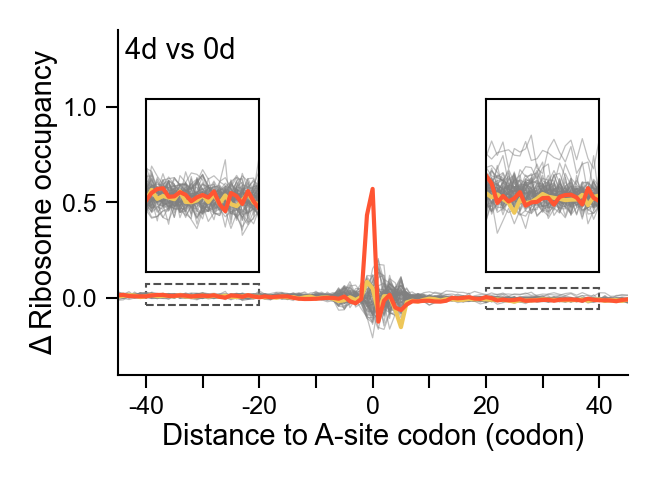

<Figure size 640x480 with 0 Axes>

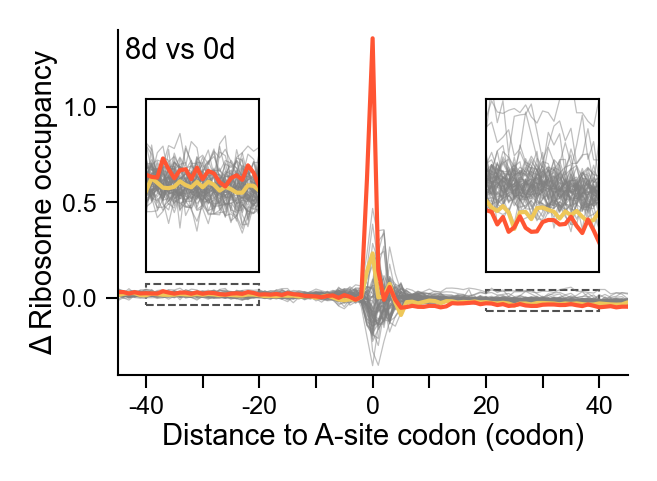

<Figure size 640x480 with 0 Axes>

In [5]:
disp_codons = codons #['GAA','CUG','GGU','GUA']

fig_size = {'D4':(1.7, 1.15),
            'D8':(1.7, 1.15)}
for day in ['D4','D8']:
    
    fig = plt.figure(figsize=fig_size[day], dpi=300)
    ax = plt.axes([0,0,1,1])
    
    # ax.axhline(0, c='k', lw=0.5)
    for codon in disp_codons[:-2]:
        c='gray'
        # if codon in ['GCG','CCG','UCG','ACG'] : c='#2271B2'
        ax.plot(range(-50+5,51+5), avg_diff_data_codon[codon][day],
                lw=0.3, c=c, alpha=0.5, label=codon)
    
    for codon in disp_codons[-2:]:
        if codon in ['GAA'] : c='#FF5533'
        if codon in ['GAG'] : c='#EEC759'
        ax.plot(range(-50+5,51+5), avg_diff_data_codon[codon][day],
                lw=1, c=c, label=codon)
    ax.text(0.015, 0.98, f'{day[1]}d vs 0d', transform=ax.transAxes, ha='left', va='top', fontsize=7)
    
    ax.set_xlim(-45, 45)
    ax.set_ylim(-0.4, 1.4)
    ax.set_xticks([-40, -30, -20, -10, 0, 10, 20, 30 ,40])
    ax.set_yticks([0,0.5,1])
    ax.set_xticklabels([-40, '', -20, '', 0, '', 20, '' ,40])
    # ax.grid(lw=0.5, c='#CCCCCC', ls='-', axis='y')
    ax.tick_params(width=0.5, length=3, pad=2)
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    # ax.spines['bottom'].set_visible(False)
    # ax.spines['left'].set_visible(False)
    
    # ax.set_title(day[1]+'d')
    ax.set_xlabel('Distance to A-site codon (codon)', labelpad=1)
    ax.set_ylabel(f"\u0394 Ribosome occupancy", labelpad=1)
    
    # ax.legend(loc='upper left', bbox_to_anchor=(1.02,1.04))
    
    # mini window 1
    ax_mw1 = plt.axes([5/90, 0.3, 20/90, 0.5])
    for codon in disp_codons[:-2]:
        c='gray'
        # if codon in ['GCG','CCG','UCG','ACG'] : c='#2271B2'
        ax_mw1.plot(range(-40,-19), avg_diff_data_codon[codon][day][10-5:31-5],
                lw=0.3, c=c, alpha=0.5, label=codon)
        
    for codon in disp_codons[-2:]:
        if codon in ['GAA'] : c='#FF5533'
        if codon in ['GAG'] : c='#EEC759'
        ax_mw1.plot(range(-40,-19), avg_diff_data_codon[codon][day][10-5:31-5],
                lw=1, c=c, label=codon)
    
    ax_mw1.set_xlim(-40, -20)
    ax_mw1.set_ylim(-0.035, 0.075)
    
    ax_mw1.set_xticks([])
    ax_mw1.set_yticks([])
    
    xlims = ax_mw1.get_xlim()
    ylims = ax_mw1.get_ylim()
    rect = patches.Rectangle((xlims[0], ylims[0]), xlims[1]-xlims[0], ylims[1]-ylims[0], lw=0.5, ls='--', edgecolor='#505050', facecolor='none')
    ax.add_patch(rect)

    # mini window 2
    ax_mw2 = plt.axes([65/90, 0.3, 20/90, 0.5])
    for codon in disp_codons[:-2]:
        c='gray'
        # if codon in ['GCG','CCG','UCG','ACG'] : c='#2271B2'
        ax_mw2.plot(range(20,41), avg_diff_data_codon[codon][day][70-5:91-5],
                lw=0.3, c=c, alpha=0.5, label=codon)

    for codon in disp_codons[-2:]:
        if codon in ['GAA'] : c='#FF5533'
        if codon in ['GAG'] : c='#EEC759'
        ax_mw2.plot(range(20,41), avg_diff_data_codon[codon][day][70-5:91-5],
                lw=1, c=c, label=codon)
    
    ax_mw2.set_xlim(20, 40)
    if day=='D4' : ax_mw2.set_ylim(-0.055, 0.055)
    if day=='D8' : ax_mw2.set_ylim(-0.065, 0.045)
    
    ax_mw2.set_xticks([])
    ax_mw2.set_yticks([])
    
    xlims = ax_mw2.get_xlim()
    ylims = ax_mw2.get_ylim()
    rect = patches.Rectangle((xlims[0], ylims[0]), xlims[1]-xlims[0], ylims[1]-ylims[0], lw=0.5, ls='--', edgecolor='#505050', facecolor='none')
    ax.add_patch(rect)
    
    
    plt.savefig(f'adi_metacodon_{day[1]}d.pdf', bbox_inches='tight')
    plt.show()
    plt.clf()